# Weekly Assignment 2: matplotlib


### Overall instructions:

There are four tasks as part of this assignment, all described in this notebook.

For parts 1, 2, and 4, you will write code in this notebook, each of which will create a plot.

For part 3, you must paste a URL, which will point to the page you create using github pages.

To submit, please run all cells in this notebook, save it as an HTML or PDF file, and upload both the html/pdf file AND the .ipynb file (this notebook) to Canvas. To save the notebook as an html/pdf file, select the File menu from within the notebook itself, and choose "Save and Export Notebook As", and then choose the desired format.

In addition, for Part 4, you will need to upload a zipfile as described in that section.

In summary, you should submit:
- this notebook as a .ipynb file
- this notebook exported as an HTML or PDF file
- a zipfile as described in Part 4

Please note: it is your responsibility to make sure that you submit the approprite files, and that your code works when you submit. To make sure things are working, we recommend you use Kernel > Restart Kernel, and then Run > Run All Cells, before you export or upload your submission. If you are missing files, or your code does not run properly, points will be deducted.


## Task 1

Please use this notebook to show your work in recreating the first visualizations from the second part of the first lab (the Tableau lab). Specifically, please try to reproduce the first figure (The Bechdel Test Over Time) from this article as closely as you can: https://fivethirtyeight.com/features/the-dollar-and-cents-case-against-hollywoods-exclusion-of-women/

Target figure:

![1.1](https://raw.githubusercontent.com/dallascard/SI649_public/master/matplotlib_hw1/betchdel.png)

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [2]:
# Load the data from movies_independent_part_2.csv using pandas
data = pd.read_csv('movies_independent_part_2.csv')


In [3]:
# Create the first visualization (The Bechdel Test Over Time)
# You are free to use any workflow you like, but some suggested steps are given below:

In [4]:
# Suggested steps:

# 1. Inspect the data to see if you need to worry about NaNs, etc.
data.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
data_filtered = data[['index', 'year','title', 'clean_test', 'binary']]
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1794 non-null   int64 
 1   year        1794 non-null   int64 
 2   title       1794 non-null   object
 3   clean_test  1794 non-null   object
 4   binary      1794 non-null   object
dtypes: int64(2), object(3)
memory usage: 70.2+ KB


In [5]:
# 2. For each year, count the number of films with each test result
result = data_filtered.groupby(['year', 'clean_test']).size().unstack().fillna(0).reset_index()
result

clean_test,year,dubious,men,notalk,nowomen,ok
0,1970,0.0,0.0,0.0,0.0,1.0
1,1971,0.0,1.0,4.0,0.0,0.0
2,1972,0.0,0.0,2.0,0.0,1.0
3,1973,0.0,1.0,3.0,0.0,1.0
4,1974,0.0,1.0,4.0,0.0,2.0
5,1975,1.0,2.0,2.0,0.0,0.0
6,1976,0.0,1.0,4.0,0.0,3.0
7,1977,0.0,0.0,4.0,1.0,2.0
8,1978,1.0,1.0,2.0,2.0,2.0
9,1979,0.0,0.0,2.0,1.0,2.0


In [6]:
# 3. Combine the counts into the 5-year buckets used in the visualization
result['year_group'] = pd.cut(result.year, bins=range(1970, 2021, 5))
result_5yr = result.groupby('year_group').sum().reset_index()
result_5yr = result_5yr.drop(columns=['year'])
result_5yr

C:\Users\Administrator\AppData\Local\Temp\ipykernel_82228\2680258903.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_5yr = result.groupby('year_group').sum().reset_index()


clean_test,year_group,dubious,men,notalk,nowomen,ok
0,"(1970, 1975]",1.0,5.0,15.0,0.0,4.0
1,"(1975, 1980]",4.0,5.0,14.0,6.0,13.0
2,"(1980, 1985]",7.0,8.0,16.0,10.0,13.0
3,"(1985, 1990]",7.0,12.0,22.0,6.0,25.0
4,"(1990, 1995]",6.0,11.0,34.0,15.0,45.0
5,"(1995, 2000]",20.0,30.0,84.0,15.0,125.0
6,"(2000, 2005]",22.0,38.0,98.0,28.0,203.0
7,"(2005, 2010]",45.0,49.0,143.0,42.0,238.0
8,"(2010, 2015]",30.0,36.0,88.0,19.0,136.0
9,"(2015, 2020]",0.0,0.0,0.0,0.0,0.0


In [7]:
# 4. Convert the counts per bucket into percentages
## Calculate the total number of movies per year
total_movies = result_5yr[['dubious', 'men', 'notalk', 'nowomen', 'ok']].sum(axis=1)
## Calculate the percentage of movies of each category
for col in ['dubious', 'men', 'notalk', 'nowomen', 'ok']:
    result_5yr[col] = result_5yr[col] / total_movies * 100

# Change the year_group column to a string
result_5yr['year_group'] = result_5yr['year_group'].astype(str)
result_5yr

clean_test,year_group,dubious,men,notalk,nowomen,ok
0,"(1970, 1975]",4.000000,20.000000,60.000000,0.000000,16.000000
1,"(1975, 1980]",9.523810,11.904762,33.333333,14.285714,30.952381
2,"(1980, 1985]",12.962963,14.814815,29.629630,18.518519,24.074074
3,"(1985, 1990]",9.722222,16.666667,30.555556,8.333333,34.722222
4,"(1990, 1995]",5.405405,9.909910,30.630631,13.513514,40.540541
5,"(1995, 2000]",7.299270,10.948905,30.656934,5.474453,45.620438
6,"(2000, 2005]",5.655527,9.768638,25.192802,7.197943,52.185090
7,"(2005, 2010]",8.704062,9.477756,27.659574,8.123791,46.034816
8,"(2010, 2015]",9.708738,11.650485,28.478964,6.148867,44.012945
9,"(2015, 2020]",NaN,NaN,NaN,NaN,NaN


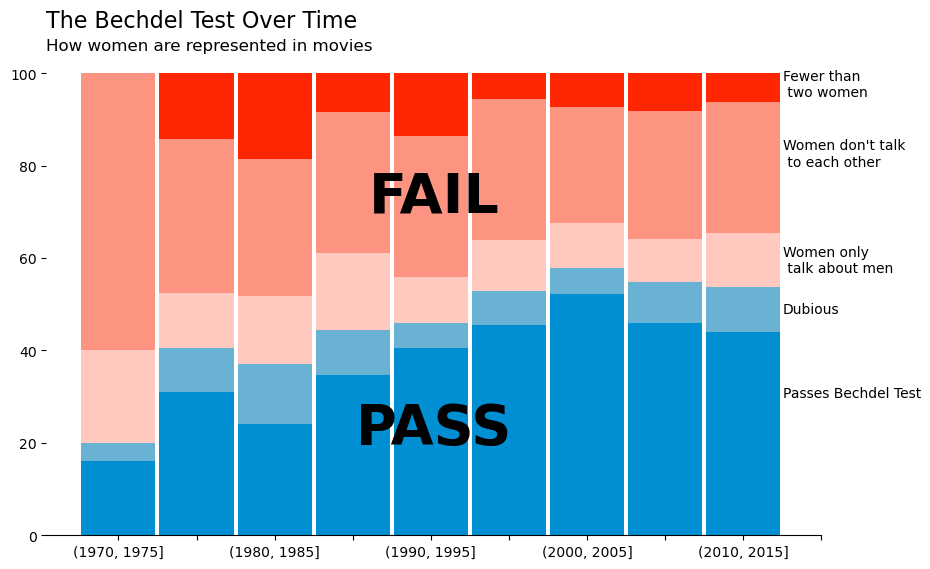

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.95  # Set the desired bar width here
ax.bar(result_5yr.year_group, result_5yr.ok, label='Pass Bechedel Test', color='#008fd3', width=bar_width)
ax.bar(result_5yr.year_group, result_5yr.dubious, label='Dubious', bottom=result_5yr.ok, color='#69b2d3', width=bar_width)
ax.bar(result_5yr.year_group, result_5yr.men, label='Women only talked about men', bottom=result_5yr.ok + result_5yr.dubious, color='#ffc9bf', width=bar_width)
ax.bar(result_5yr.year_group, result_5yr.notalk, 
       label = "Women don't talk to each other'", 
       bottom=result_5yr.ok + result_5yr.dubious + result_5yr.men,
       color='#fd9481', width=bar_width)
ax.bar(result_5yr.year_group, result_5yr.nowomen,
       label = "Fewer than two women",
       bottom=result_5yr.ok + result_5yr.dubious + result_5yr.men + result_5yr.notalk,
       color='#ff2701', width=bar_width)

# fix up the colors, tick marks, and add the title
ax.text(0, 1.1, 'The Bechdel Test Over Time', 
       horizontalalignment='left', 
       fontsize=16, 
       transform = ax.transAxes)

# add a subtitle
ax.text(0, 1.05, 'How women are represented in movies',
       horizontalalignment='left',
       fontsize=12,
       transform = ax.transAxes)

# Fix the xticks
xticks = ax.get_xticks()
xtick_labels = ax.get_xticklabels()

for i, label in enumerate(xtick_labels):
    if i % 2 == 0:
       label.set_visible(True)
    else:
       label.set_visible(False)

ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)


# add texts
ax.text(0.5, 0.7, 'FAIL',
       horizontalalignment='center',
       fontsize=40,
       fontweight = 'bold', 
       transform = ax.transAxes)

ax.text(0.5, 0.2, 'PASS',
       horizontalalignment='center',
       fontsize=40,
       fontweight = 'bold', 
       transform = ax.transAxes)

# add text as legend

ax.text(0.95, 0.95, "Fewer than \n two women",
       horizontalalignment = 'left',
       fontsize = 10,
       transform = ax.transAxes)

ax.text(0.95, 0.8, "Women don't talk \n to each other",
       horizontalalignment = 'left',
       fontsize = 10,
       transform = ax.transAxes)


ax.text(0.95, 0.57, "Women only \n talk about men",
       horizontalalignment = 'left',
       fontsize = 10,
       transform = ax.transAxes)


ax.text(0.95, 0.48, "Dubious",
       horizontalalignment = 'left',
       fontsize = 10,
       transform = ax.transAxes)

ax.text(0.95, 0.3, "Passes Bechdel Test",
       horizontalalignment = 'left',
       fontsize = 10,
       transform = ax.transAxes)



# Fix the axis
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)    

# save the figure
plt.savefig('bechdel_test_over_time.png')

## Task 2: Improving the style of a figure

Here, we will create a basic bar chart for you. Your job is to make it look like the target image we will provide below. Please try to get as close as possible to the target image! If you can't figure something out, try searching online and/or read the matplotlib documentation.

In [9]:
# Load the data
df = pd.read_csv('data.csv', header=0, index_col=None)
df.head()

,condition,ROR,lowCI,highCI,Total,base_rate,Case,increased_rate,pop_estimate,ratio
0,Abnormal behavior,33.9,31.8,36.2,28421,0.002929,1036,0.106042,9769.684326,0.036452
1,Aggression,31.7,29.8,33.8,32013,0.003300,1089,0.111526,9764.578604,0.034017
2,Anger,24.8,22.8,27.0,21031,0.002168,589,0.058527,10063.760857,0.028006
3,Suicidal thoughts,21.5,20.3,22.9,52853,0.005448,1222,0.124749,9795.684324,0.023121
4,Crying,19.9,18.2,21.7,23462,0.002418,533,0.052475,10157.133150,0.022718


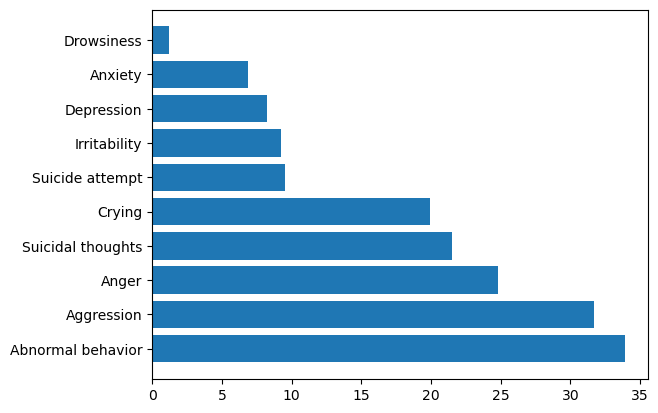

In [10]:
# Plot a basic bar chart with default stylings
fig, ax = plt.subplots()
ax.barh(df['condition'], df['ROR'])
plt.show();

# display the rows in descending order


This data is also plotted in a New York Times article (available here: https://www.nytimes.com/2024/01/09/health/fda-singulair-asthma-drug-warning.html), but with nicer aesthetics.

Here is the target image:

![1.1](https://raw.githubusercontent.com/dallascard/SI649_public/master/matplotlib_hw1/montelukast.png)

Your job is to write matplotlib code to create the New York Times chart (or as close as you can get).

Remember when you are done to run all cells, and upload your notebook to Canvas



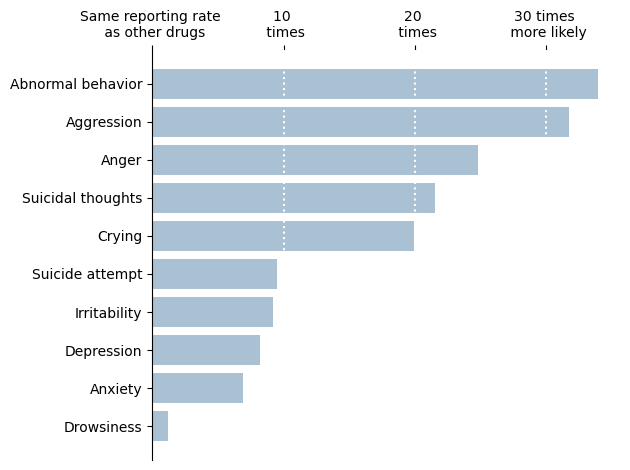

In [11]:
# Your code goes here
df = df.sort_values(by='ROR', ascending=True)
fig, ax = plt.subplots()
ax.barh(df['condition'], df['ROR'], color='#aac1d4')

# add the dot lines at 10, 20 and 30
ax.axvline(x=10, color='white', linestyle='dotted')
ax.axvline(x=20, color='white', linestyle='dotted')
ax.axvline(x=30, color='white', linestyle='dotted')

# switch the horizontal axis to the upper side
ax.xaxis.tick_top()
ticks = [0, 10, 20, 30]
ticks_labels = ["Same reporting rate \n as other drugs", "10 \n times", "20 \n times", "30 times \n more likely"]
ax.xaxis.set_ticks(ticks)
ax.xaxis.set_ticklabels(ticks_labels)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adjust the layout
plt.tight_layout()

# Save the figure

plt.savefig('replicate_pic2.png')

## Task 3: Github Pages

Using the instructions provided in the lab, create a github page (using github pages). Embed both of the above images you have made on that page, and submit a link to it. (Please make sure everything is set to be public).


### Put the link to your page with the two figures above here:

[My github pages](https://nakafrozn.github.io/posts/datawishw/datavishw/)

## Task 4: ChatGPT

For the last part of this assignment, we want you to experiment with using generative AI to make complex visualizations.

You should all have access to UM GPT (available here: https://umgpt.umich.edu/)

We want you to use UM GPT to try recreating (in matplotlib) the famous Napoleon's March figure by Minard, as shown below:


![1.1](https://raw.githubusercontent.com/dallascard/SI649_public/master/matplotlib_hw1/minard.jpg)

Here are the steps we want you to follow in detail:
1. Using Chrome or Firefox, spend some time working with UM GPT, and see how well it is able to recreate the above figure, specifically using **matplotlib**. (You may find this challenging, but see how close you can get). Note that you may need to copy and paste the code into a notebook to see how well it is working.
2. When you are satisfied with your result, **paste the code that generates the final figure in the cell below, and run it**.
3. In addition, **save your UM GPT chat** to disk. Using your browser, select File > Save Page As..., and choose "Web Page, complete"
4. Try opening the .html file it saves, to make sure it shows your full chat history.
5. **Zip the files that it creates** (this should be one file with a .html extension, and a folder with approximately the same name).
6. Upload to Canvas the zipfile of your chat history, as well as this notebook, and a copy of this notebook saved as an .html file (see above)

Note that this question is more about effort than about getting everything perfect. Please put some thought into this, and get a sense of what works and what doesn't. However, we will also have a contest to see who is able to get the closest to the original image!

(If you would rather use another system other than UM GPT, that is okay. However, you need to be able to export your chat history somehow, which is not enabled by default in some of the best known systems (e.g., ChatGPT). If you can find a way to export your chat history, then you are welcome to use whichever generative AI system you like. However, please do not upload or provide any code to the system you use. See how far you can get just by coaxing it into doing what you want. In addition, the code it generates **must use matplotlib to create the figure**).

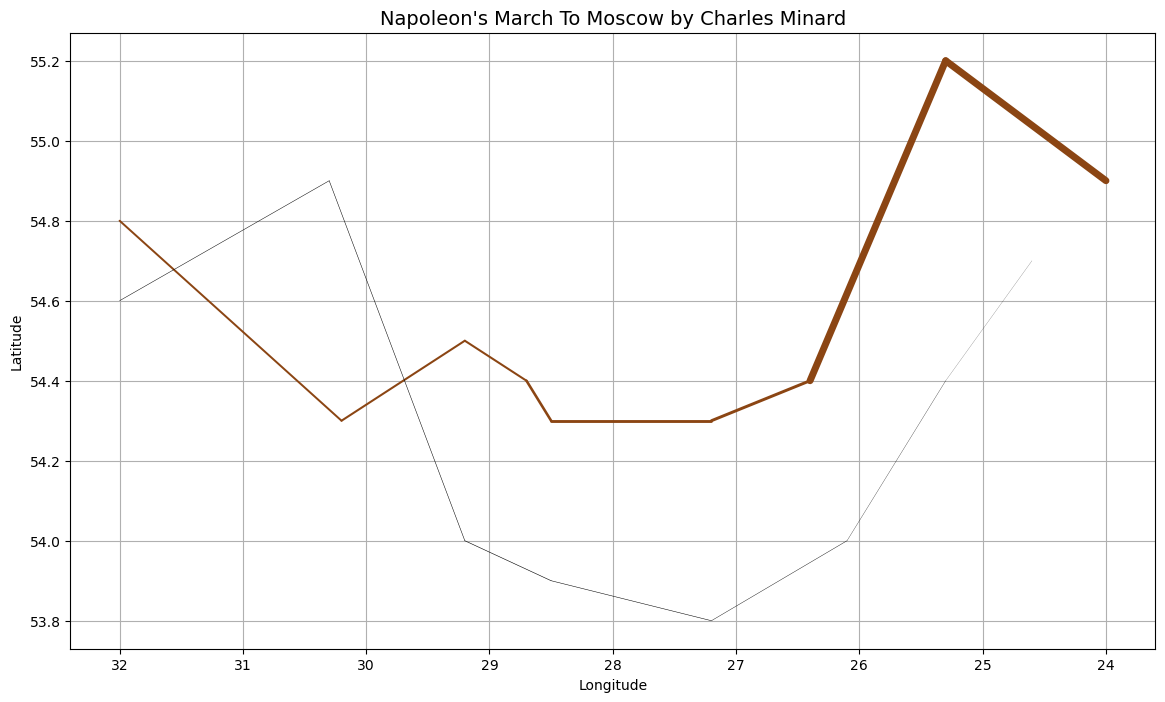

In [12]:
# Advance data: (longitude, latitude, army_size)
advance_data = [
    (24.0, 54.9, 340000),  # Kowno
    (25.3, 55.2, 340000),  # Wilia
    (26.4, 54.4, 145000),  # Wilna
    (27.2, 54.3, 140000),  # Smorgoni
    (28.5, 54.3, 127100),  # Minsk
    (28.7, 54.4, 100000),  # Molodexno
    (29.2, 54.5, 100000),  # Orcha
    (30.2, 54.3, 96000),   # Borisov
    (32.0, 54.8, 24000)    # Moscow
]

# Retreat data: (longitude, latitude, army_size)
retreat_data = [
    (32.0, 54.8 - 0.2, 24000),   # Moscow
    (30.3, 55.1 - 0.2, 25000),   # Krasnoi
    (29.2, 54.2 - 0.2, 28000),   # Orcha
    (28.5, 54.1 - 0.2, 25000),   # Minsk
    (27.2, 54.0 - 0.2, 20000),   # Smorgoni
    (26.1, 54.2 - 0.2, 14000),   # Wilna
    (25.3, 54.6 - 0.2, 8000),    # Wilia
    (24.6, 54.9 - 0.2, 4000)     # Kowno
]

plt.figure(figsize=(14, 8))

# Plot advance
for i in range(len(advance_data) - 1):
    x_adv = [advance_data[i][0], advance_data[i+1][0]]
    y_adv = [advance_data[i][1], advance_data[i+1][1]]
    size_adv = advance_data[i][2]
    plt.plot(x_adv, y_adv, linewidth=5 * (size_adv / 340000), color='saddlebrown', solid_capstyle='round')

# Plot retreat with variable thickness based on army size
for i in range(len(retreat_data) - 1):
    x_ret = [retreat_data[i][0], retreat_data[i+1][0]]
    y_ret = [retreat_data[i][1], retreat_data[i+1][1]]
    size_ret = retreat_data[i][2]
    plt.plot(x_ret, y_ret, linewidth=5 * (size_ret / 340000), color='black', solid_capstyle='round')

plt.title("Napoleon's March To Moscow by Charles Minard", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.gca().invert_xaxis()

plt.show()